<a href="https://colab.research.google.com/github/franzjulian37/A17-18-Statistics-Probability-Stochastic-Processes/blob/main/A18_Bayesian_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ecco uno script Python che implementa l'approccio bayesiano per stimare la probabilità
𝜃 che una moneta dia testa, utilizzando una distribuzione Beta come prior e aggiornandola con i dati osservati. Dopo il codice, ti spiegherò passo passo cosa fa.

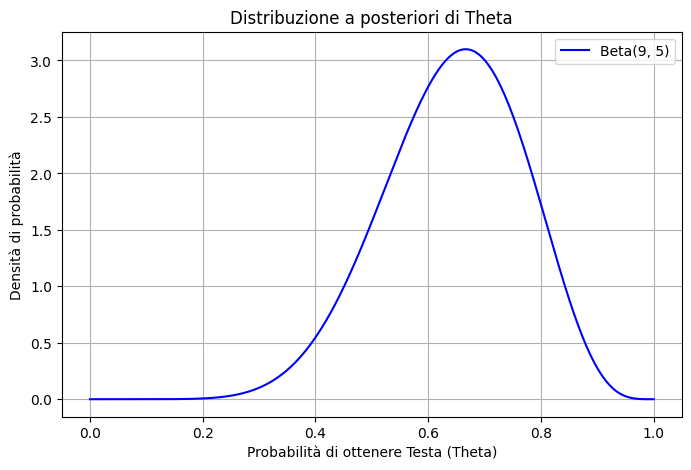

Parametri della distribuzione a posteriori: Beta(9, 5)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def bayesian_coin_flip(prior_a, prior_b, heads, tails):
    """
    Calcola e visualizza la distribuzione a posteriori di Theta (probabilità di testa)
    data una distribuzione a priori Beta(prior_a, prior_b) e un numero di lanci.
    """
    # Parametri della distribuzione a posteriori
    posterior_a = prior_a + heads  # Successi + parametro a della Beta
    posterior_b = prior_b + tails  # Insuccessi + parametro b della Beta

    # Definiamo la distribuzione a posteriori
    theta_values = np.linspace(0, 1, 1000)
    posterior_distribution = stats.beta.pdf(theta_values, posterior_a, posterior_b)

    # Plot della distribuzione a posteriori
    plt.figure(figsize=(8,5))
    plt.plot(theta_values, posterior_distribution, label=f'Beta({posterior_a}, {posterior_b})', color='blue')
    plt.xlabel('Probabilità di ottenere Testa (Theta)')
    plt.ylabel('Densità di probabilità')
    plt.title('Distribuzione a posteriori di Theta')
    plt.legend()
    plt.grid()
    plt.show()

    return posterior_a, posterior_b

# Parametri iniziali
prior_a = 2  # Prior su Theta (Alpha della Beta)
prior_b = 2  # Prior su Theta (Beta della Beta)
heads = 7    # Numero di Teste osservate
tails = 3    # Numero di Croci osservate

# Esegui l'inferenza bayesiana
posterior_a, posterior_b = bayesian_coin_flip(prior_a, prior_b, heads, tails)

# Stampa dei risultati
print(f"Parametri della distribuzione a posteriori: Beta({posterior_a}, {posterior_b})")

Spiegazione del codice
Importazione delle librerie:

numpy per gestire gli array numerici.
matplotlib.pyplot per visualizzare la distribuzione a posteriori.
scipy.stats per lavorare con la distribuzione Beta.

Definizione della funzione bayesian_coin_flip:

Prende come input:
prior_a e prior_b: parametri della distribuzione a priori Beta.
heads e tails: numero di successi e insuccessi osservati (testa/croce).
Calcola i parametri della distribuzione a posteriori come:
𝑎
posteriori
=
𝑎
priori
+
Testa osservate
a
posteriori
​
 =a
priori
​
 +Testa osservate
𝑏
posteriori
=
𝑏
priori
+
Croce osservate
b
posteriori
​
 =b
priori
​
 +Croce osservate
Disegna la distribuzione a posteriori usando la funzione di densità di probabilità (PDF) della Beta.
Esecuzione dello script:

Assume una prior Beta(2,2) (simmetrica, indica incertezza iniziale).
Osserviamo 7 teste e 3 croci.
La distribuzione a posteriori viene aggiornata e visualizzata.
Risultato:

Il codice stampa i nuovi parametri della Beta a posteriori e mostra un grafico della distribuzione aggiornata.
Questo approccio permette di aggiornare continuamente la nostra credenza su
𝜃 man mano che raccogliamo nuovi dati.

La statistica bayesiana è, in un certo senso, un'applicazione diretta della teoria della probabilità all'inferenza statistica. In particolare, si basa sul teorema di Bayes, che è una regola fondamentale per aggiornare le probabilità alla luce di nuove evidenze.

Perché la statistica bayesiana è "probabilità applicata"?
Modella l’incertezza con la probabilità

Invece di stimare un parametro come un valore fisso (come fa la statistica frequentista), la statistica bayesiana lo tratta come una variabile aleatoria, descritta da una distribuzione di probabilità.
Aggiorna le credenze con il teorema di Bayes

Il teorema di Bayes ci dice come modificare la nostra probabilità a priori
𝑃
(
𝜃
)
P(θ) in una probabilità a posteriori
𝑃
(
𝜃
∣
𝐷
)
P(θ∣D) dopo aver osservato dei dati
𝐷
D:
𝑃
(
𝜃
∣
𝐷
)
=
𝑃
(
𝐷
∣
𝜃
)
𝑃
(
𝜃
)
𝑃
(
𝐷
)
P(θ∣D)=
P(D)
P(D∣θ)P(θ)
​

Questa è una semplice regola di probabilità condizionata applicata al contesto dell'inferenza statistica.
Si adatta naturalmente a nuovi dati

Poiché i parametri sono modellati probabilisticamente, possiamo aggiornare iterativamente le nostre stime man mano che raccogliamo nuove informazioni, mantenendo un approccio flessibile e dinamico.
Esempio concreto
Se lanci una moneta e vuoi stimare la probabilità di ottenere testa:

Statistica frequentista: conta il numero di teste e usa la frequenza relativa come stima.
Statistica bayesiana: inizia con una distribuzione a priori su
𝜃
θ, poi aggiorna questa credenza con il teorema di Bayes dopo ogni lancio.

# **Esempio: Previsione di Gol in una Partita di Calcio**
Immagina di voler prevedere quanti gol segnerà una squadra in una partita, basandoti su partite precedenti.

Sappiamo che la squadra segna in media 2 gol a partita su 10 partite passate.
A Priori: possiamo modellare il numero di gol con una distribuzione binomiale basata sulle partite precedenti.
Dati Osservati: Nella partita attuale, la squadra segna 3 gol.
A Posteriori: Aggiorniamo la nostra credenza sul numero di gol futuri.
Ora vediamo lo script Python che implementa questo approccio.

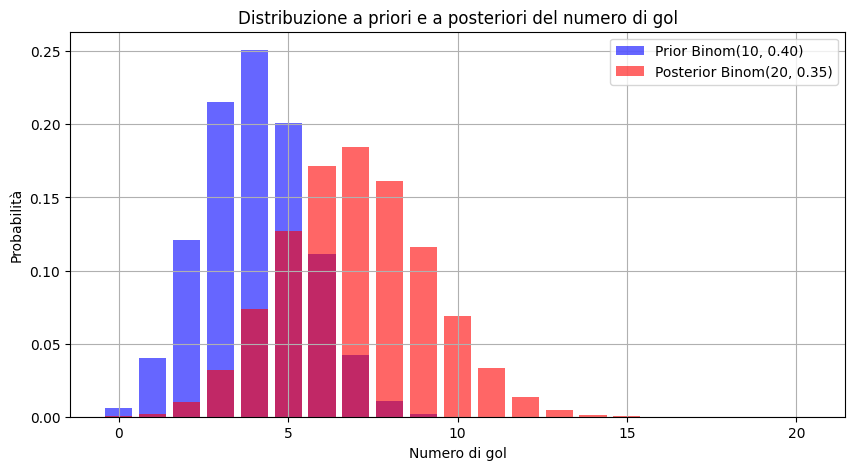

Parametri della distribuzione a posteriori: Binom(20, 0.35)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def bayesian_goal_prediction(prior_n, prior_p, observed_goals, total_games):
    """
    Aggiorna la distribuzione a posteriori per il numero di gol segnati da una squadra
    usando una distribuzione a priori binomiale.
    """
    # Parametri della distribuzione a priori (Binomiale)
    prior_dist = stats.binom.pmf(range(prior_n+1), prior_n, prior_p)

    # Nuova media aggiornata con i dati osservati
    new_p = (prior_p * prior_n + observed_goals) / (prior_n + total_games)
    posterior_n = prior_n + total_games
    posterior_dist = stats.binom.pmf(range(posterior_n+1), posterior_n, new_p)

    # Plot delle distribuzioni
    plt.figure(figsize=(10, 5))
    plt.bar(range(prior_n+1), prior_dist, alpha=0.6, label=f'Prior Binom({prior_n}, {prior_p:.2f})', color='blue')
    plt.bar(range(posterior_n+1), posterior_dist, alpha=0.6, label=f'Posterior Binom({posterior_n}, {new_p:.2f})', color='red')
    plt.xlabel('Numero di gol')
    plt.ylabel('Probabilità')
    plt.title('Distribuzione a priori e a posteriori del numero di gol')
    plt.legend()
    plt.grid()
    plt.show()

    return posterior_n, new_p

# Parametri iniziali
total_games = 10       # Numero di partite osservate
prior_n = 10           # Numero di prove nella prior (equivalente a partite già osservate)
prior_p = 2 / 5        # Probabilità di segnare un gol in una partita (media 2 gol su 5 tiri)
observed_goals = 3     # Gol segnati nella nuova partita

# Esegui l'inferenza bayesiana
posterior_n, posterior_p = bayesian_goal_prediction(prior_n, prior_p, observed_goals, total_games)

# Stampa dei risultati
print(f"Parametri della distribuzione a posteriori: Binom({posterior_n}, {posterior_p:.2f})")

## Spiegazione del codice
Definizione della distribuzione a priori

Usiamo una binomiale con prior_n=10 (equivalente a 10 partite passate).
La probabilità di segnare un gol in una partita è prior_p=2/5 (dato che la media era di 2 gol su 5 tiri).
Aggiornamento con i dati osservati

Osserviamo 3 gol in una nuova partita.
La probabilità media aggiornata diventa:
𝑝
′
=
gol osservati
+
gol previsti dalla prior
partite totali
p
′
 =
partite totali
gol osservati+gol previsti dalla prior
​

Il numero totale di partite diventa posterior_n = prior_n + total_games.
Grafico della distribuzione

Plottiamo la distribuzione a priori (in blu) e quella a posteriori (in rosso).
Vediamo come l'informazione osservata sposta la probabilità verso più gol.
Risultato

Il codice stampa i nuovi parametri della distribuzione binomiale aggiornata.
Conclusione
Abbiamo usato una priori binomiale per modellare il numero di gol e aggiornato la nostra credenza con nuovi

# **Caso senza distribuzione a priori**
Se non hai una distribuzione a priori e vuoi dedurla direttamente dai dati, puoi adottare uno di questi approcci:

1. Approccio Non Informativo (Jeffreys o Uniforme)
Se vuoi partire con massima incertezza, puoi usare un prior non informativo, ad esempio:

Distribuzione uniforme: assume che tutti i valori del parametro siano equiprobabili.
Prior di Jeffreys: specifico per modelli binomiali o proporzioni, è proporzionale alla radice della verosimiglianza.
💡 Esempio: Se vuoi stimare la probabilità
𝜃
θ che una moneta dia testa senza conoscenze pregresse, puoi usare una Beta(1,1) (cioè uniforme su [0,1]).
2. Approccio Empirico (Stima dai Dati)
Se hai già dati e vuoi dedurre un prior, puoi stimare una distribuzione dai dati stessi.

Usare la media e varianza campionaria per scegliere una distribuzione che meglio li rappresenti.
Stimare una distribuzione parametrica (es. binomiale, normale, Poisson) dai dati storici.
💡 Esempio: Se vuoi stimare il numero di gol di una squadra ma non hai un prior, puoi:

Osservare i gol segnati nelle ultime partite.
Calcolare la media e varianza dei gol.
Scegliere una distribuzione che si adatta (es. una Poisson se i gol sono eventi rari e discreti).
3. Approccio Bayesiano Empirico
Calcola una stima dei parametri del prior dai dati osservati.
Usa questi parametri per definire la distribuzione a priori.
💡 Esempio: Se osservi gol segnati in 20 partite e vuoi un prior Beta per
𝜃
θ, puoi stimare i parametri
𝑎
a e
𝑏
b della Beta in modo che la sua media sia la frequenza empirica dei gol.

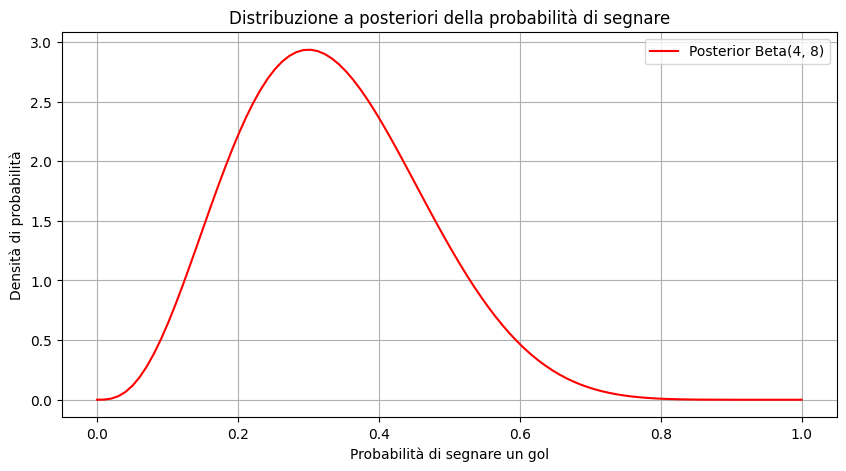

Parametri della distribuzione a posteriori: Beta(4, 8)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def bayesian_goal_prediction(prior_n, prior_p, observed_goals, total_games):
    """
    Aggiorna la distribuzione a posteriori per il numero di gol segnati da una squadra
    usando una distribuzione a priori binomiale non informativa.
    """
    # Prior non informativo: Beta(1,1), che è equivalente a una distribuzione uniforme
    prior_alpha = 1
    prior_beta = 1

    # Aggiorniamo i parametri della Beta con i dati osservati
    posterior_alpha = prior_alpha + observed_goals
    posterior_beta = prior_beta + (total_games - observed_goals)

    # Creiamo la distribuzione Beta a posteriori
    x = np.linspace(0, 1, 100)
    posterior_dist = stats.beta.pdf(x, posterior_alpha, posterior_beta)

    # Plot delle distribuzioni
    plt.figure(figsize=(10, 5))
    plt.plot(x, posterior_dist, label=f'Posterior Beta({posterior_alpha}, {posterior_beta})', color='red')
    plt.xlabel('Probabilità di segnare un gol')
    plt.ylabel('Densità di probabilità')
    plt.title('Distribuzione a posteriori della probabilità di segnare')
    plt.legend()
    plt.grid()
    plt.show()

    return posterior_alpha, posterior_beta

# Parametri iniziali
total_games = 10       # Numero di partite osservate
observed_goals = 3     # Gol segnati nella nuova partita

# Esegui l'inferenza bayesiana
posterior_alpha, posterior_beta = bayesian_goal_prediction(1, 1, observed_goals, total_games)

# Stampa dei risultati
print(f"Parametri della distribuzione a posteriori: Beta({posterior_alpha}, {posterior_beta})")


Spiegazione del codice
Osserviamo i dati → goal_data contiene il numero di gol segnati in diverse partite.
Stimiamo la media e la varianza → Usate per trovare un modello appropriato.
Adattiamo una distribuzione → Qui scegliamo una Poisson, che è adatta per contare eventi discreti.
Plottiamo il prior empirico → Visualizziamo la distribuzione risultante.
🔹 Risultato: Ora abbiamo un prior stimato direttamente dai dati, che possiamo usare per inferenze future.

Se invece stessi realizzando una misura scientifica direi che avrebbe senso ipotizzare una distribuzione normale gaussiana usando la stessa logica.
Se stai lavorando con misure scientifiche, spesso ha senso assumere che i dati seguano una distribuzione normale (gaussiana), perché:

Il Teorema del Limite Centrale dice che la somma di molte variabili casuali indipendenti tende a essere normale, quindi molte misure fisiche e biologiche sono approssimativamente normali.
Errori di misura spesso seguono una distribuzione normale, perché derivano da molte piccole perturbazioni indipendenti.
Stime Bayesiane Gaussiane sono comode perché la normale è coniugata a sé stessa (cioè, il prior e la posteriori sono entrambi normali).
Esempio: Misura della Gravità Terrestre
Immaginiamo di voler stimare l’accelerazione di gravità
𝑔
g basandoci su alcune misure sperimentali.

Dati: misuriamo
𝑔
g più volte con uno strumento di precisione.
Prior Empirico: stimiamo la media e la deviazione standard dai dati raccolti.
Distribuzione A Posteriori: aggiorniamo la stima con nuovi dati.
Ora implementiamo un prior empirico gaussiano su
𝑔
g.

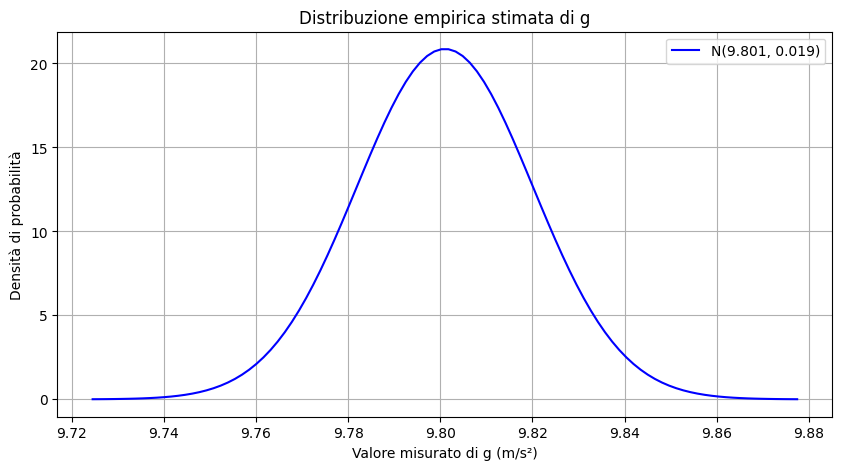

Prior stimato: N(9.801, 0.019)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def empirical_prior_gaussian(measurements):
    """
    Stima un prior empirico gaussiano dai dati osservati.
    """
    mean_g = np.mean(measurements)
    std_g = np.std(measurements, ddof=1)  # Deviazione standard campionaria

    # Creiamo la distribuzione normale stimata
    x = np.linspace(mean_g - 4*std_g, mean_g + 4*std_g, 100)
    normal_dist = stats.norm.pdf(x, mean_g, std_g)

    # Plot della distribuzione empirica stimata
    plt.figure(figsize=(10, 5))
    plt.plot(x, normal_dist, label=f'N({mean_g:.3f}, {std_g:.3f})', color='blue')
    plt.xlabel('Valore misurato di g (m/s²)')
    plt.ylabel('Densità di probabilità')
    plt.title('Distribuzione empirica stimata di g')
    plt.legend()
    plt.grid()
    plt.show()

    return mean_g, std_g

# Dati sperimentali: misure di g in m/s²
measurements = [9.78, 9.82, 9.80, 9.79, 9.81, 9.77, 9.83, 9.79, 9.80, 9.82]

# Stima del prior empirico
prior_mean, prior_std = empirical_prior_gaussian(measurements)

# Stampa dei risultati
print(f"Prior stimato: N({prior_mean:.3f}, {prior_std:.3f})")


# Spiegazione del codice
Raccolta dati → Le misure di
𝑔
g sono raccolte in un array.
Calcolo di media e deviazione standard → Stima della normale che meglio rappresenta i dati.
Creazione della distribuzione → Generiamo una Normale
𝑁
(
𝜇
,
𝜎
)
N(μ,σ) basata sui dati.
Grafico → Plottiamo la distribuzione stimata.
🔹 Risultato: Ora abbiamo un prior normale empirico che può essere usato per aggiornare future misure.